In [ ]:
from sentence_transformers import SentenceTransformer
import spacy_sentence_bert
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from scipy import spatial

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"

In [ ]:
BERT_BASE_NLI_MEAN = SentenceTransformer('bert-base-nli-mean-tokens')
SPACY_BERT_BASE_NLI_MEAN = spacy_sentence_bert.load_model('en_bert_base_nli_mean_tokens')

100%|██████████| 405M/405M [00:25<00:00, 16.0MB/s]


In [ ]:
DISTILBERT_BASE_NLI_MEAN = SentenceTransformer('distilbert-base-nli-mean-tokens')
SPACY_DISTILBERT_BASE_NLI_MEAN = spacy_sentence_bert.load_model('en_distilbert_base_nli_mean_tokens')

100%|██████████| 245M/245M [00:16<00:00, 14.5MB/s]


In [ ]:
ROBERTA_BASE_NLI_MEAN = SentenceTransformer('roberta-base-nli-mean-tokens')
SPACY_ROBERTA_BASE_NLI_MEAN = spacy_sentence_bert.load_model('en_roberta_base_nli_mean_tokens')

100%|██████████| 460M/460M [00:27<00:00, 16.8MB/s]


In [ ]:
XLM_BASE = SentenceTransformer('xlm-r-base-en-ko-nli-ststb')
SPACY_XLM_BASE = spacy_sentence_bert.load_model('xx_xlm_r_base_en_ko_nli_ststb')

100%|██████████| 824M/824M [00:35<00:00, 23.5MB/s]


In [ ]:
BERT_LARGE_STSB = SentenceTransformer('bert-large-nli-stsb-mean-tokens')
SPACY_BERT_LARGE_STSB = spacy_sentence_bert.load_model('en_bert_large_nli_stsb_mean_tokens')

100%|██████████| 1.24G/1.24G [00:51<00:00, 24.1MB/s]


In [ ]:
a=[' 10 906GP-ULTS  FORMA -86; 651L, 230V/50; GP COUNTRY OF ORIGIN: China Commodity Code: 8418.40.0000  1 EA  5,060.00  5,060.00 USD', ' 20 75007201  Sorvall ST8, 230V COUNTRY OF ORIGIN: China Commodity Code: 8421199090  1 EA  1,200.00  1,200.00 USD', ' 30 75005715  MicroClick 24 x 2 Fixed Angle Rotor COUNTRY OF ORIGIN: Germany Commodity Code: 8421.91.6000  1 EA  480.00  480.00 USD', ' 40 75005706  M10 SWINGING BUCKET ROTOR COUNTRY OF ORIGIN: Germany Commodity Code: 8421.91.6000  1 EA  300.00  300.00 USD', ' 50 75005723  M10 UNSEALED BUCKET SET OF 2 COUNTRY OF ORIGIN: Germany Commodity Code: 8421.91.6000  1 EA  260.00 Total net value  260.00 USD 7,300.00 USD']

In [ ]:
sentence_embeddings1 = BERT_BASE_NLI_MEAN.encode(a)

In [ ]:
similarity = [["", *a]]
idxemb = 0
for sentence, embedding in zip(a, sentence_embeddings1):
    idxemb += 1
    arr = [idxemb]
#     print("")
    for idx, embedding2 in enumerate(sentence_embeddings1):
        result = 1 - spatial.distance.cosine(embedding, embedding2)
        if result < 0.6:
            arr.append(0)
        else:
            arr.append(result)
    similarity.append(arr)

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(similarity[1:], columns=similarity[0])
df.head(15)

...   50 75005723  M10 UNSEALED BUCKET SET OF 2 COUNTRY OF ORIGIN: Germany Commodity Code: 8421.91.6000  1 EA  260.00 Total net value  260.00 USD 7,300.00 USD
0  1  ...                                           0.696244                                                                                                        
1  2  ...                                           0.695920                                                                                                        
2  3  ...                                           0.885577                                                                                                        
3  4  ...                                           0.931341                                                                                                        
4  5  ...                                           1.000000                                                                                                        

[5 rows x 6 columns]

In [ ]:
import copy

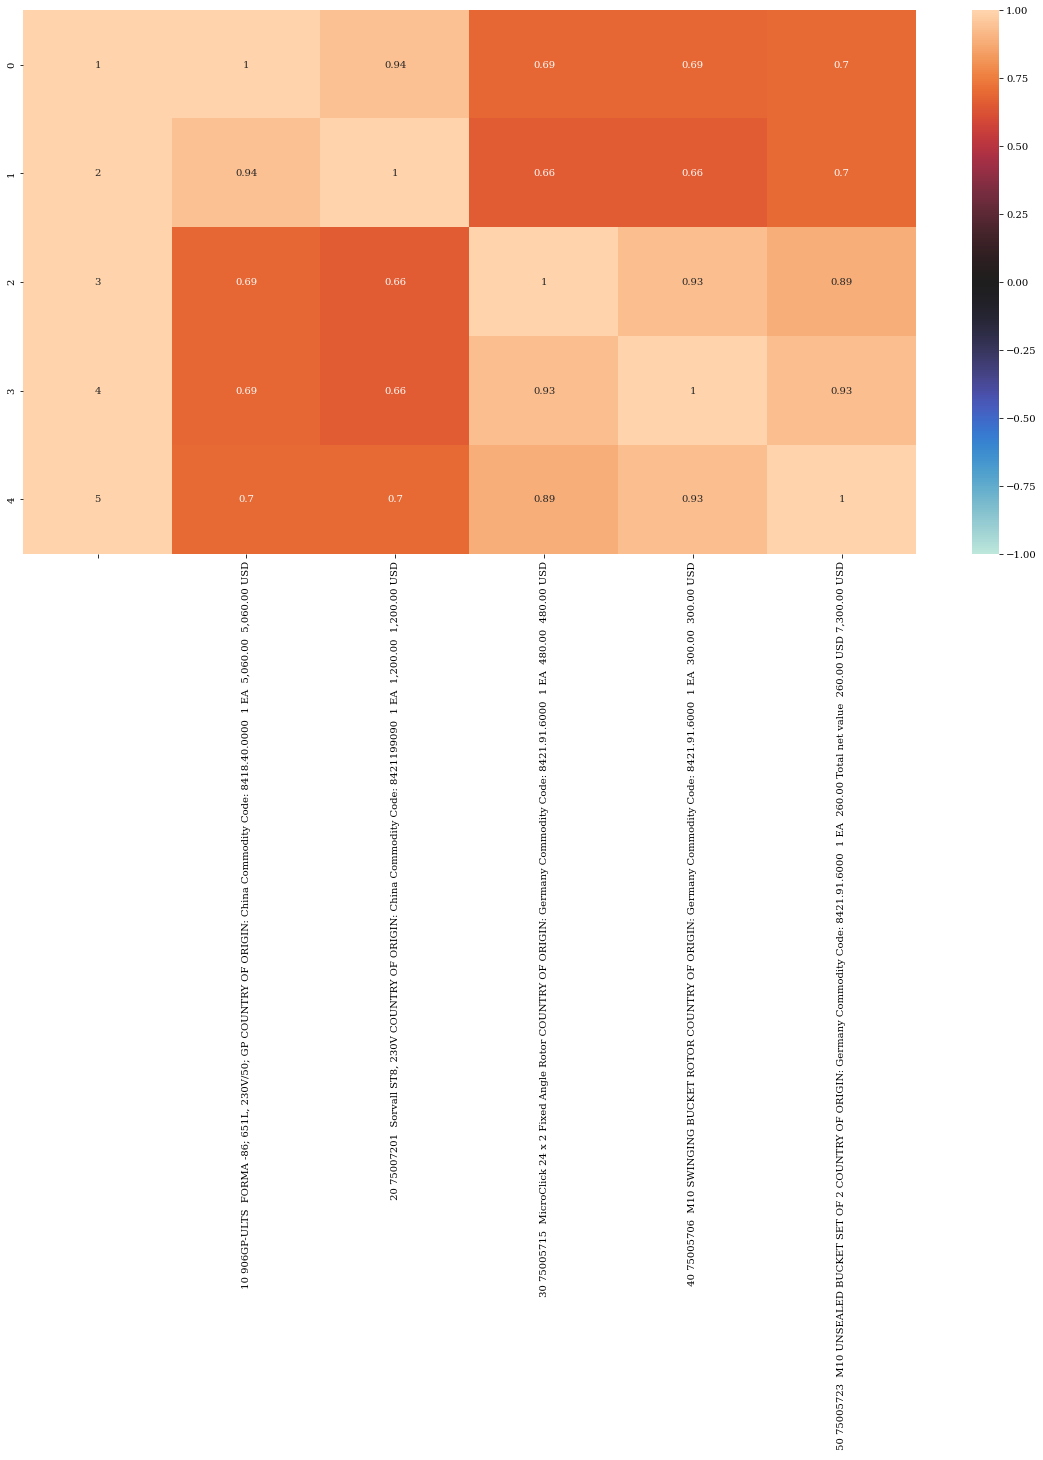

In [ ]:
df1 = copy.deepcopy(df)
sns.heatmap(df1, center=0, vmin=-1, vmax=1, annot=True)

In [ ]:
similarity = [["", *a]]
spacy_arr = []
for sent in a:
  doc = SPACY_BERT_BASE_NLI_MEAN(sent)
  spacy_arr.append(doc)
idxemb = 0
for doc_1 in spacy_arr:
  idxemb += 1
  arr = [idxemb]
  for doc_2 in spacy_arr:
    arr.append(doc_1.similarity(doc_2))
  similarity.append(arr)

In [ ]:
spacy_df1 = pd.DataFrame(similarity[1:], columns=similarity[0])
spacy_df1.head()

...   50 75005723  M10 UNSEALED BUCKET SET OF 2 COUNTRY OF ORIGIN: Germany Commodity Code: 8421.91.6000  1 EA  260.00 Total net value  260.00 USD 7,300.00 USD
0  1  ...                                           0.696244                                                                                                        
1  2  ...                                           0.695919                                                                                                        
2  3  ...                                           0.885577                                                                                                        
3  4  ...                                           0.931341                                                                                                        
4  5  ...                                           1.000000                                                                                                        

[5 rows x 6 columns]

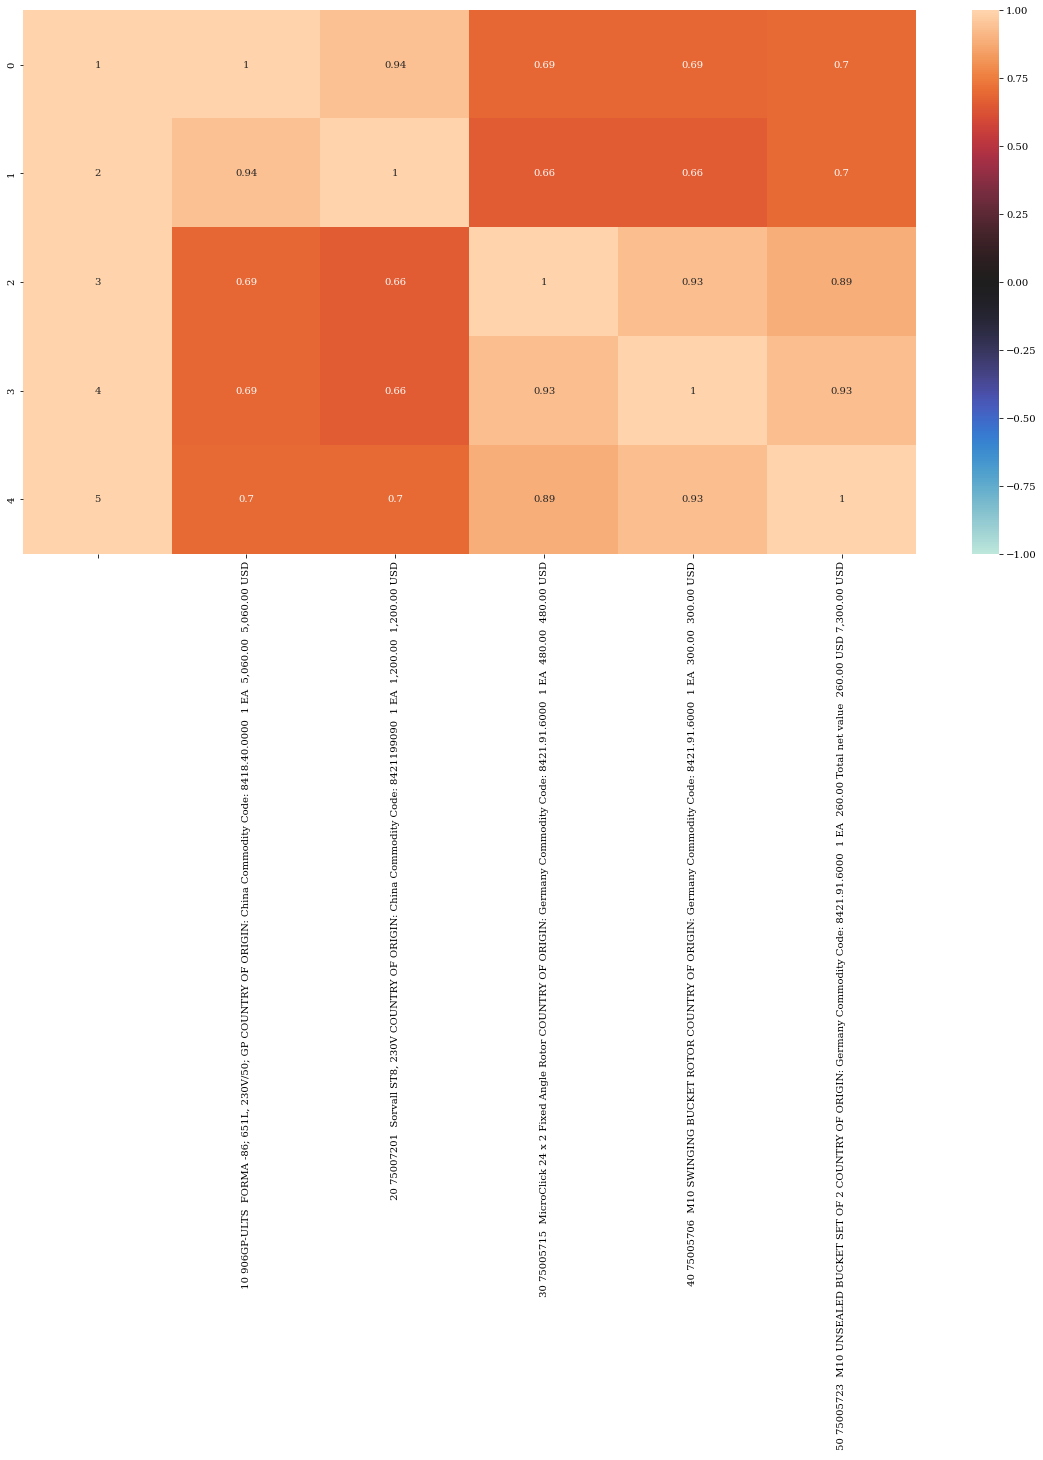

In [ ]:
sns.heatmap(spacy_df1, center=0, vmin=-1, vmax=1, annot=True)

In [ ]:
sentence_embeddings2 = DISTILBERT_BASE_NLI_MEAN.encode(a)

similarity = [["", *a]]
idxemb = 0
for sentence, embedding in zip(a, sentence_embeddings2):
    idxemb += 1
    arr = [idxemb]
#     print("")
    for idx, embedding2 in enumerate(sentence_embeddings2):
        result = 1 - spatial.distance.cosine(embedding, embedding2)
        if result < 0.6:
            arr.append(0)
        else:
            arr.append(result)
    similarity.append(arr)

df2 = pd.DataFrame(similarity[1:], columns=similarity[0])
df2.head()

...   50 75005723  M10 UNSEALED BUCKET SET OF 2 COUNTRY OF ORIGIN: Germany Commodity Code: 8421.91.6000  1 EA  260.00 Total net value  260.00 USD 7,300.00 USD
0  1  ...                                           0.699130                                                                                                        
1  2  ...                                           0.682026                                                                                                        
2  3  ...                                           0.932961                                                                                                        
3  4  ...                                           0.944978                                                                                                        
4  5  ...                                           1.000000                                                                                                        

[5 rows x 6 columns]

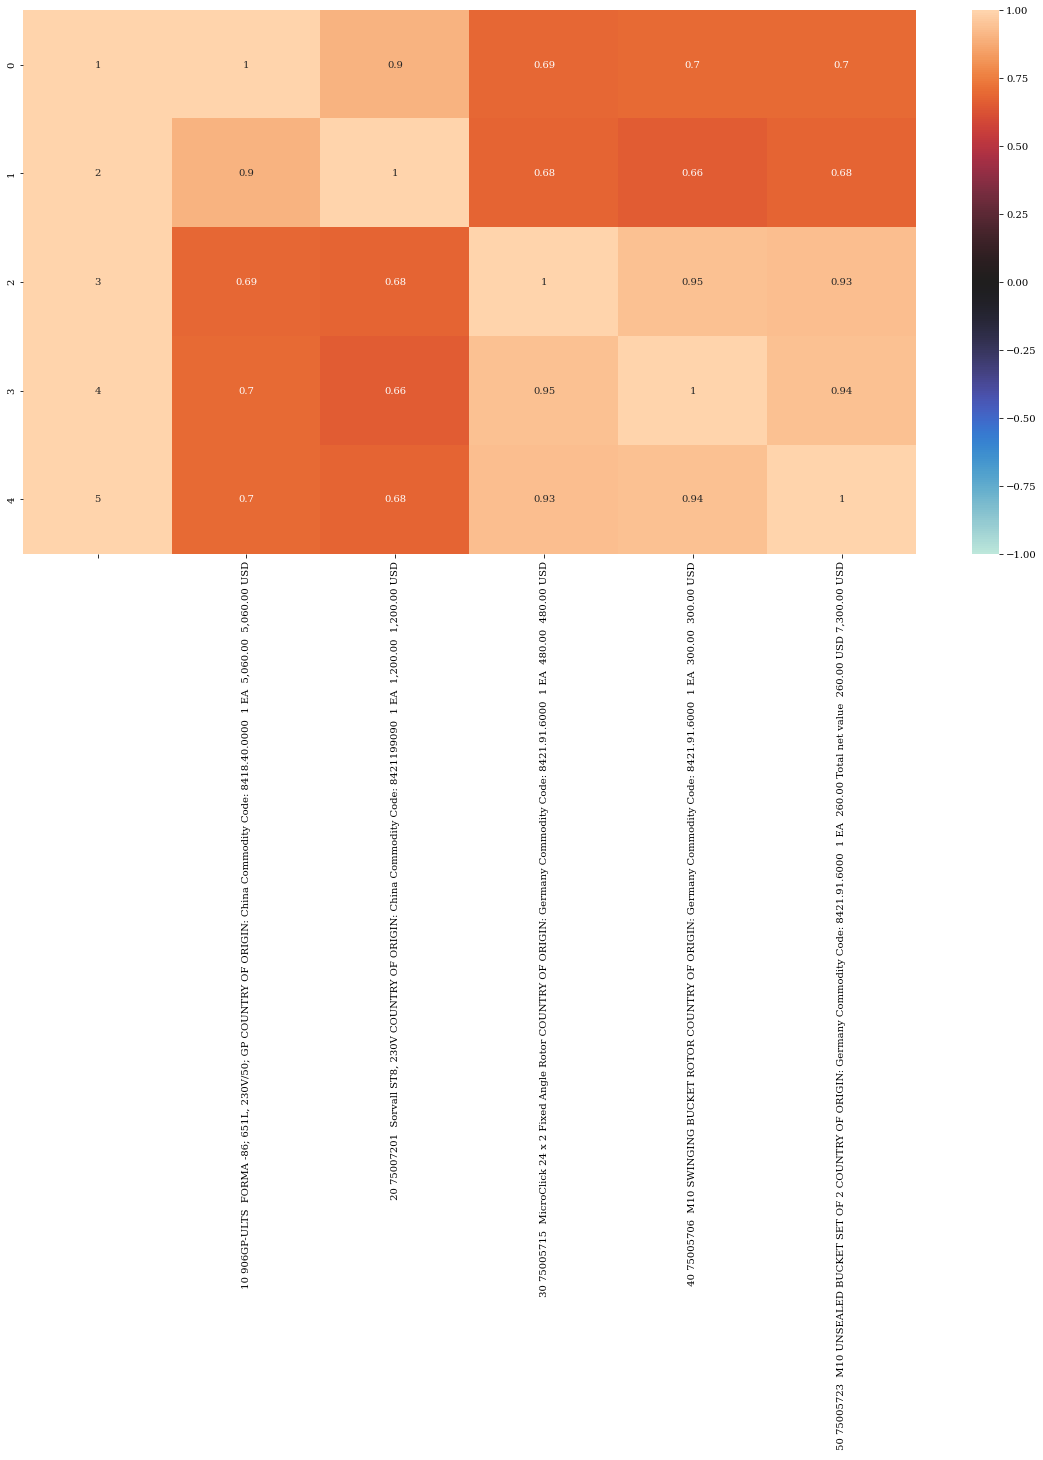

In [ ]:
sns.heatmap(df2, center=0, vmin=-1, vmax=1, annot=True)

In [ ]:
similarity = [["", *a]]
spacy_arr = []
for sent in a:
  doc = SPACY_DISTILBERT_BASE_NLI_MEAN(sent)
  spacy_arr.append(doc)
idxemb = 0
for doc_1 in spacy_arr:
  idxemb += 1
  arr = [idxemb]
  for doc_2 in spacy_arr:
    arr.append(doc_1.similarity(doc_2))
  similarity.append(arr)

spacy_df2 = pd.DataFrame(similarity[1:], columns=similarity[0])
spacy_df2.head()

...   50 75005723  M10 UNSEALED BUCKET SET OF 2 COUNTRY OF ORIGIN: Germany Commodity Code: 8421.91.6000  1 EA  260.00 Total net value  260.00 USD 7,300.00 USD
0  1  ...                                           0.699130                                                                                                        
1  2  ...                                           0.682026                                                                                                        
2  3  ...                                           0.932961                                                                                                        
3  4  ...                                           0.944978                                                                                                        
4  5  ...                                           1.000000                                                                                                        

[5 rows x 6 columns]

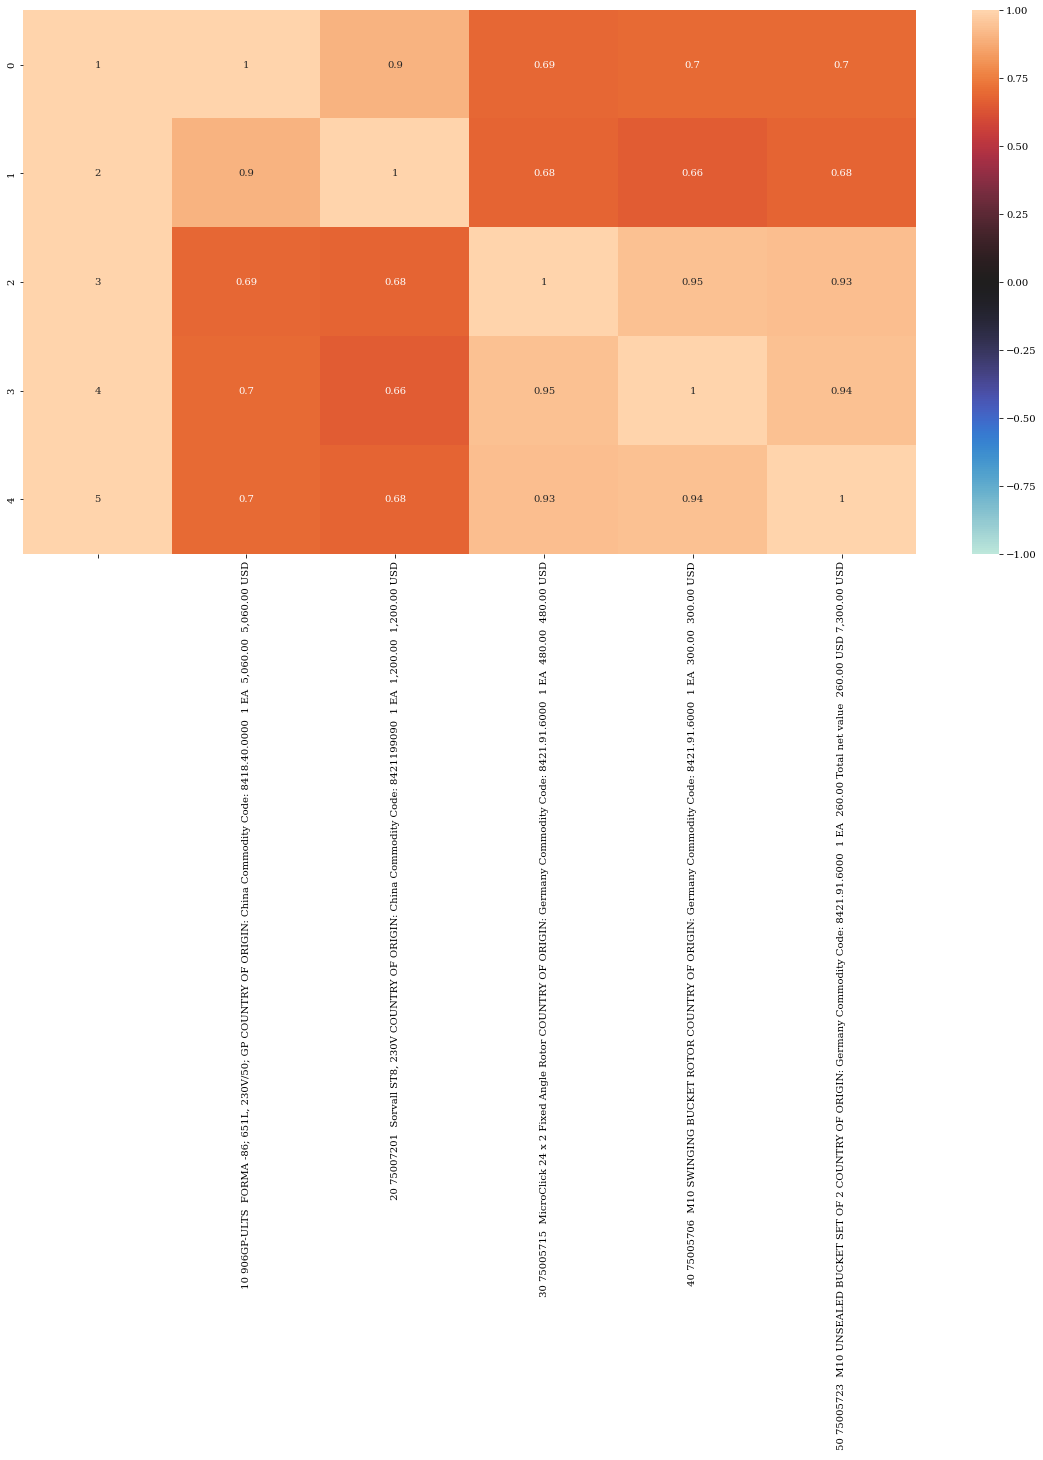

In [ ]:
sns.heatmap(spacy_df2, center=0, vmin=-1, vmax=1, annot=True)

In [ ]:
sentence_embeddings3 = ROBERTA_BASE_NLI_MEAN.encode(a)

similarity = [["", *a]]
idxemb = 0
for sentence, embedding in zip(a, sentence_embeddings3):
    idxemb += 1
    arr = [idxemb]
#     print("")
    for idx, embedding2 in enumerate(sentence_embeddings3):
        result = 1 - spatial.distance.cosine(embedding, embedding2)
        if result < 0.6:
            arr.append(0)
        else:
            arr.append(result)
    similarity.append(arr)

df3 = pd.DataFrame(similarity[1:], columns=similarity[0])
df3.head()

...   50 75005723  M10 UNSEALED BUCKET SET OF 2 COUNTRY OF ORIGIN: Germany Commodity Code: 8421.91.6000  1 EA  260.00 Total net value  260.00 USD 7,300.00 USD
0  1  ...                                           0.839404                                                                                                        
1  2  ...                                           0.838636                                                                                                        
2  3  ...                                           0.884880                                                                                                        
3  4  ...                                           0.905063                                                                                                        
4  5  ...                                           1.000000                                                                                                        

[5 rows x 6 columns]

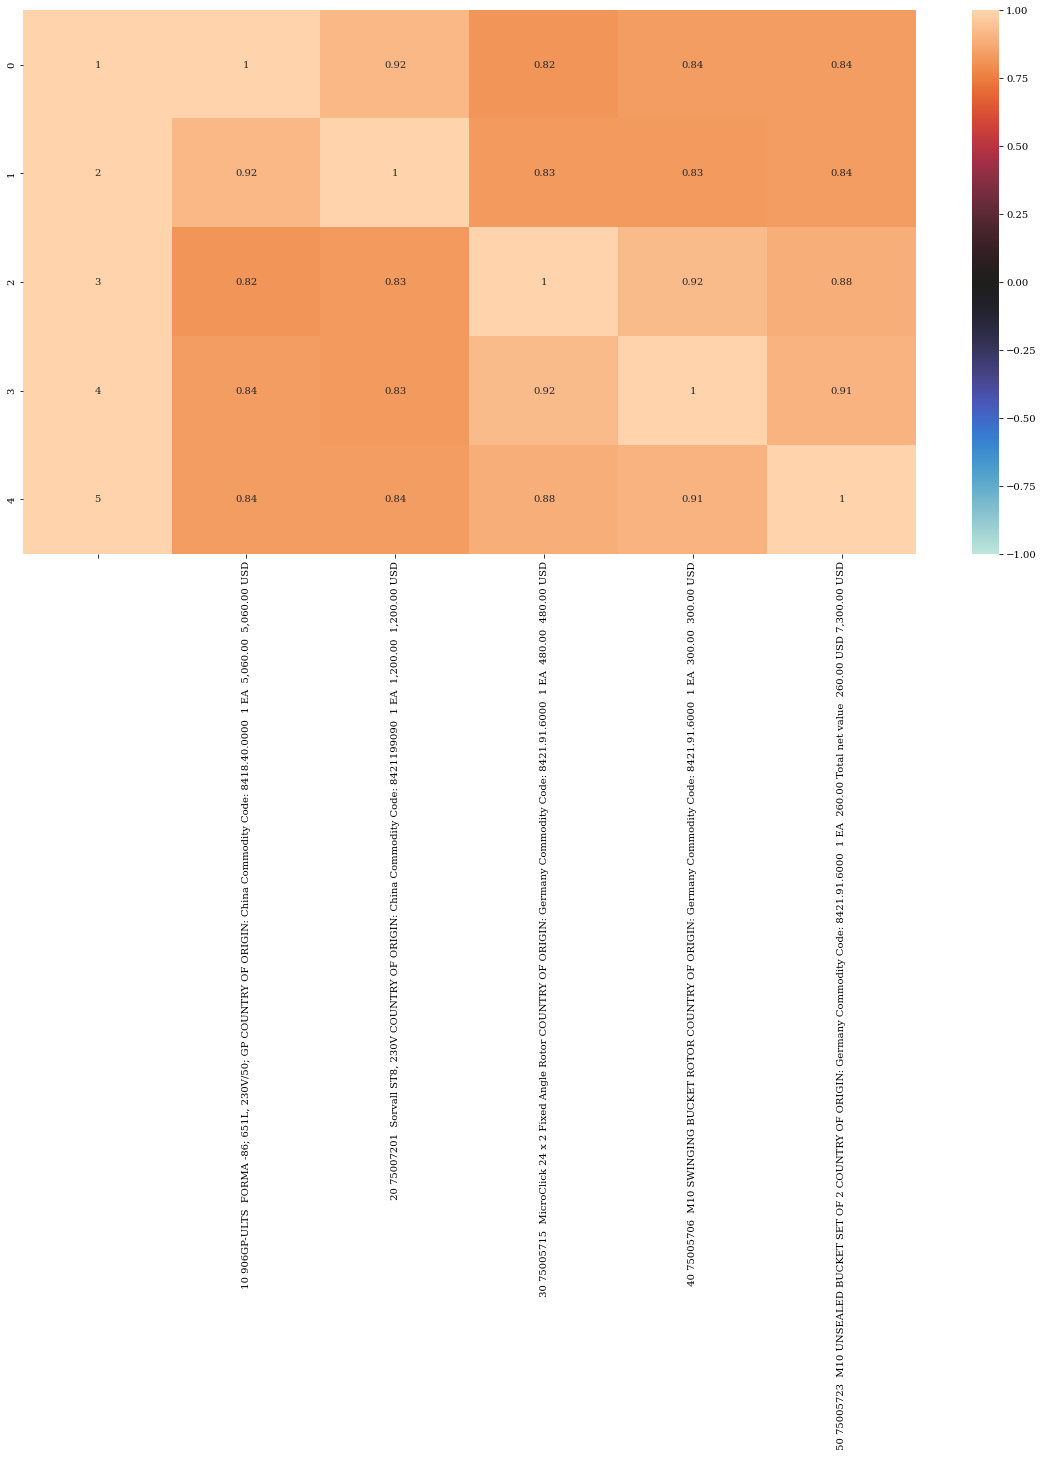

In [ ]:
sns.heatmap(df3, center=0, vmin=-1, vmax=1, annot=True)

In [ ]:
similarity = [["", *a]]
spacy_arr = []
for sent in a:
  doc = SPACY_ROBERTA_BASE_NLI_MEAN(sent)
  spacy_arr.append(doc)
idxemb = 0
for doc_1 in spacy_arr:
  idxemb += 1
  arr = [idxemb]
  for doc_2 in spacy_arr:
    arr.append(doc_1.similarity(doc_2))
  similarity.append(arr)

spacy_df3 = pd.DataFrame(similarity[1:], columns=similarity[0])
spacy_df3.head()

...   50 75005723  M10 UNSEALED BUCKET SET OF 2 COUNTRY OF ORIGIN: Germany Commodity Code: 8421.91.6000  1 EA  260.00 Total net value  260.00 USD 7,300.00 USD
0  1  ...                                           0.839404                                                                                                        
1  2  ...                                           0.838636                                                                                                        
2  3  ...                                           0.884880                                                                                                        
3  4  ...                                           0.905063                                                                                                        
4  5  ...                                           1.000000                                                                                                        

[5 rows x 6 columns]

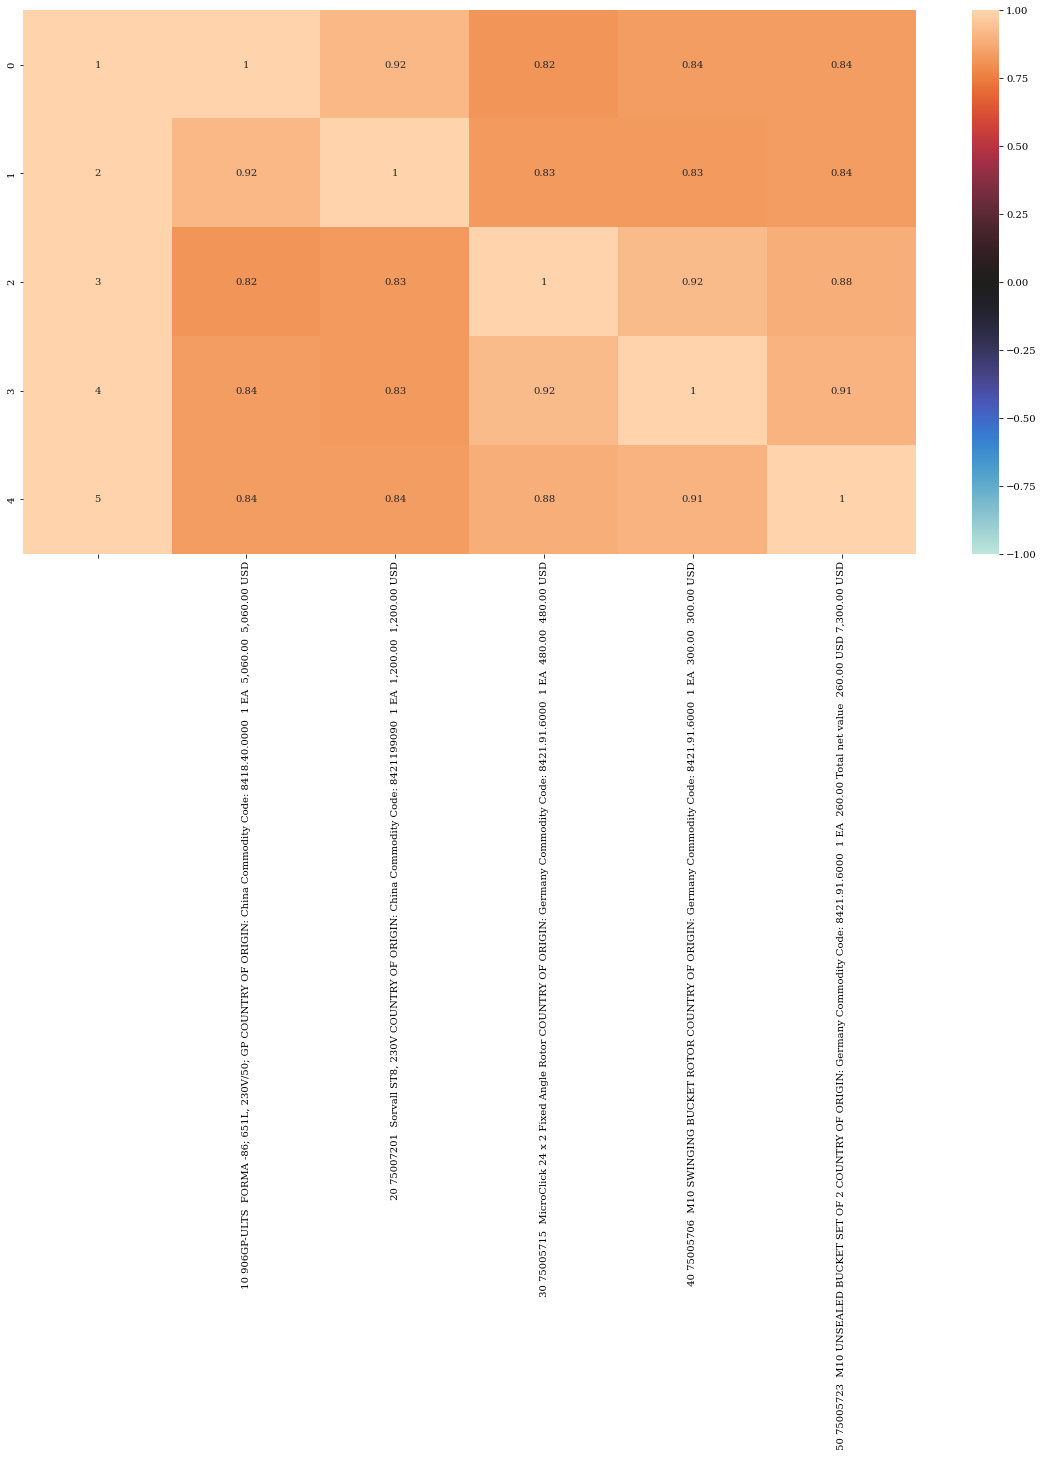

In [ ]:
sns.heatmap(spacy_df3, center=0, vmin=-1, vmax=1, annot=True)

In [ ]:
sentence_embeddings4 = XLM_BASE.encode(a)

similarity = [["", *a]]
idxemb = 0
for sentence, embedding in zip(a, sentence_embeddings4):
    idxemb += 1
    arr = [idxemb]
#     print("")
    for idx, embedding2 in enumerate(sentence_embeddings4):
        result = 1 - spatial.distance.cosine(embedding, embedding2)
        if result < 0.6:
            arr.append(0)
        else:
            arr.append(result)
    similarity.append(arr)

df4 = pd.DataFrame(similarity[1:], columns=similarity[0])
df4.head()

...   50 75005723  M10 UNSEALED BUCKET SET OF 2 COUNTRY OF ORIGIN: Germany Commodity Code: 8421.91.6000  1 EA  260.00 Total net value  260.00 USD 7,300.00 USD
0  1  ...                                           0.000000                                                                                                        
1  2  ...                                           0.000000                                                                                                        
2  3  ...                                           0.939626                                                                                                        
3  4  ...                                           0.904743                                                                                                        
4  5  ...                                           1.000000                                                                                                        

[5 rows x 6 columns]

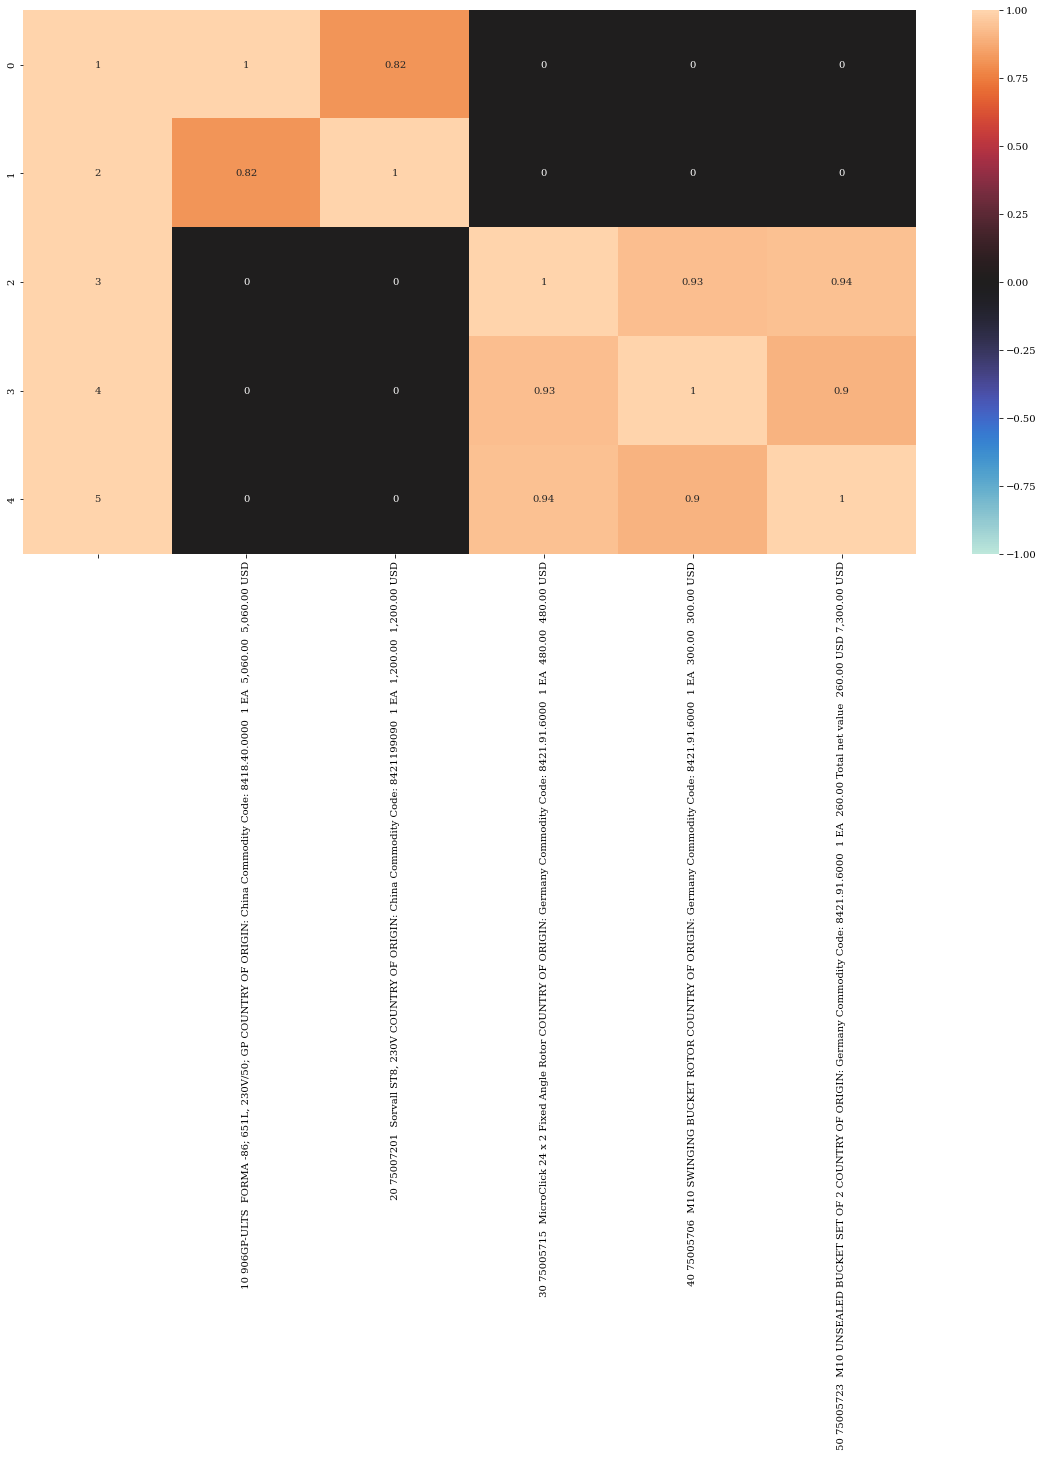

In [ ]:
sns.heatmap(df4, center=0, vmin=-1, vmax=1, annot=True)

In [ ]:
similarity = [["", *a]]
spacy_arr = []
for sent in a:
  doc = SPACY_BERT_LARGE_STSB(sent)
  spacy_arr.append(doc)
idxemb = 0
for doc_1 in spacy_arr:
  idxemb += 1
  arr = [idxemb]
  for doc_2 in spacy_arr:
    result = (doc_1.similarity(doc_2))
    if result < 0.6:
      arr.append(0)
    else:
      arr.append(result)
  similarity.append(arr)

spacy_df5 = pd.DataFrame(similarity[1:], columns=similarity[0])
spacy_df5.head()

...   50 75005723  M10 UNSEALED BUCKET SET OF 2 COUNTRY OF ORIGIN: Germany Commodity Code: 8421.91.6000  1 EA  260.00 Total net value  260.00 USD 7,300.00 USD
0  1  ...                                           0.000000                                                                                                        
1  2  ...                                           0.000000                                                                                                        
2  3  ...                                           0.939626                                                                                                        
3  4  ...                                           0.904743                                                                                                        
4  5  ...                                           1.000000                                                                                                        

[5 rows x 6 columns]

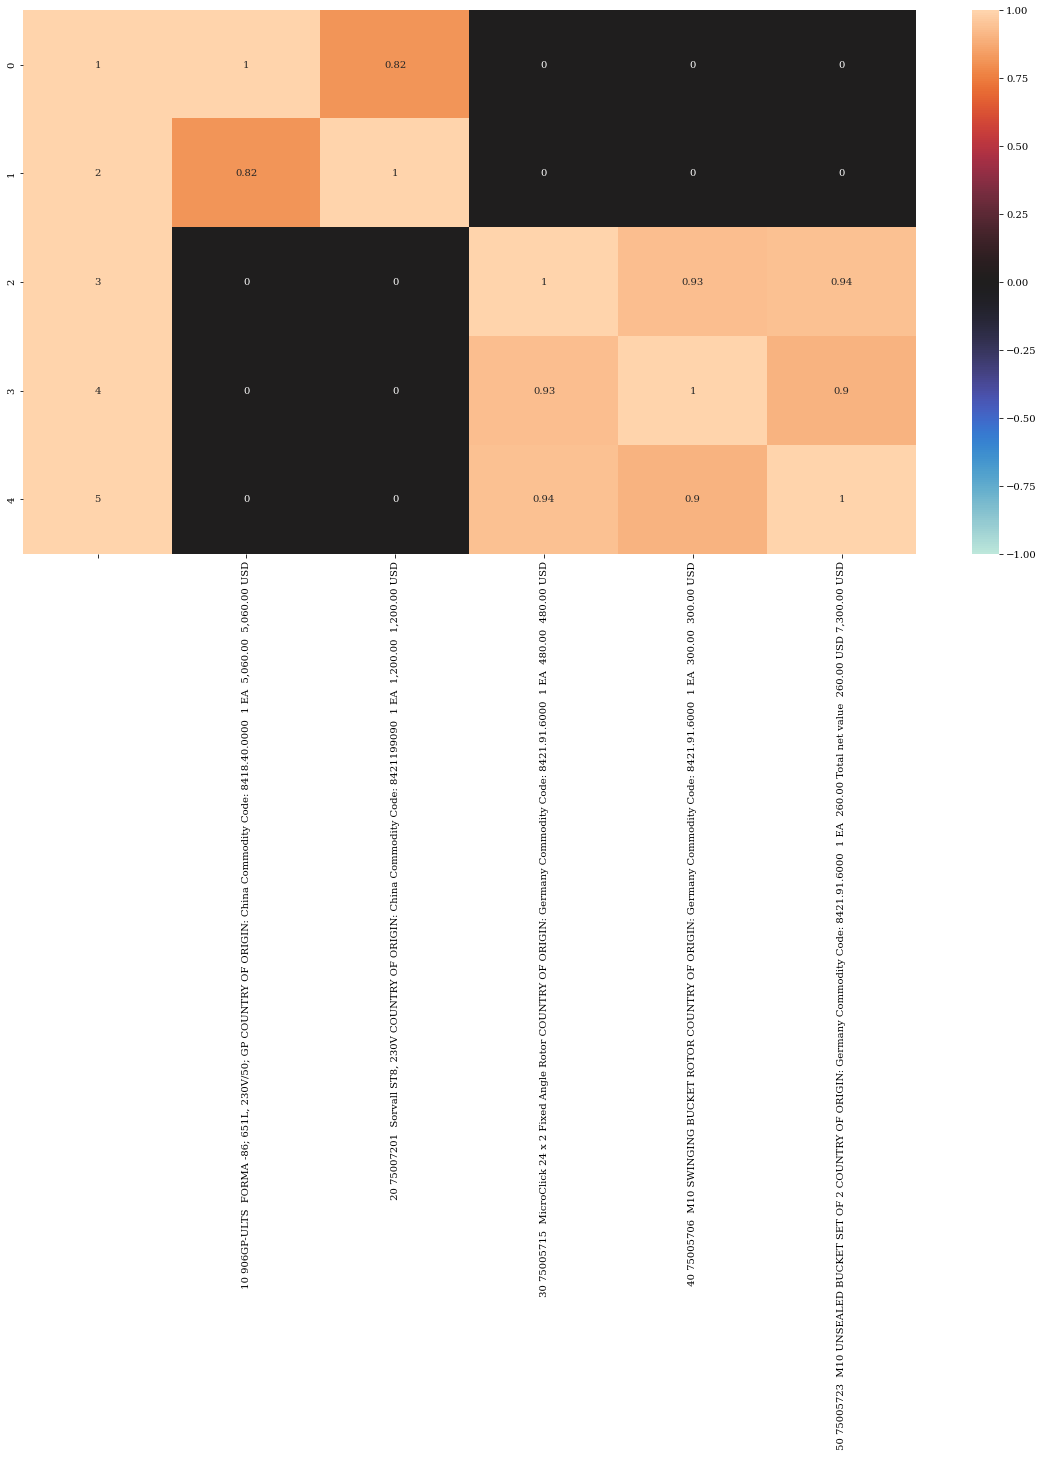

In [ ]:
sns.heatmap(spacy_df4, center=0, vmin=-1, vmax=1, annot=True)

In [ ]:
sentence_embeddings5 = BERT_LARGE_STSB.encode(a)

similarity = [["", *a]]
idxemb = 0
for sentence, embedding in zip(a, sentence_embeddings5):
    idxemb += 1
    arr = [idxemb]
#     print("")
    for idx, embedding2 in enumerate(sentence_embeddings5):
        result = 1 - spatial.distance.cosine(embedding, embedding2)
        if result < 0.6:
            arr.append(0)
        else:
            arr.append(result)
    similarity.append(arr)

df5 = pd.DataFrame(similarity[1:], columns=similarity[0])
df5.head()

...   50 75005723  M10 UNSEALED BUCKET SET OF 2 COUNTRY OF ORIGIN: Germany Commodity Code: 8421.91.6000  1 EA  260.00 Total net value  260.00 USD 7,300.00 USD
0  1  ...                                           0.000000                                                                                                        
1  2  ...                                           0.000000                                                                                                        
2  3  ...                                           0.939626                                                                                                        
3  4  ...                                           0.904743                                                                                                        
4  5  ...                                           1.000000                                                                                                        

[5 rows x 6 columns]

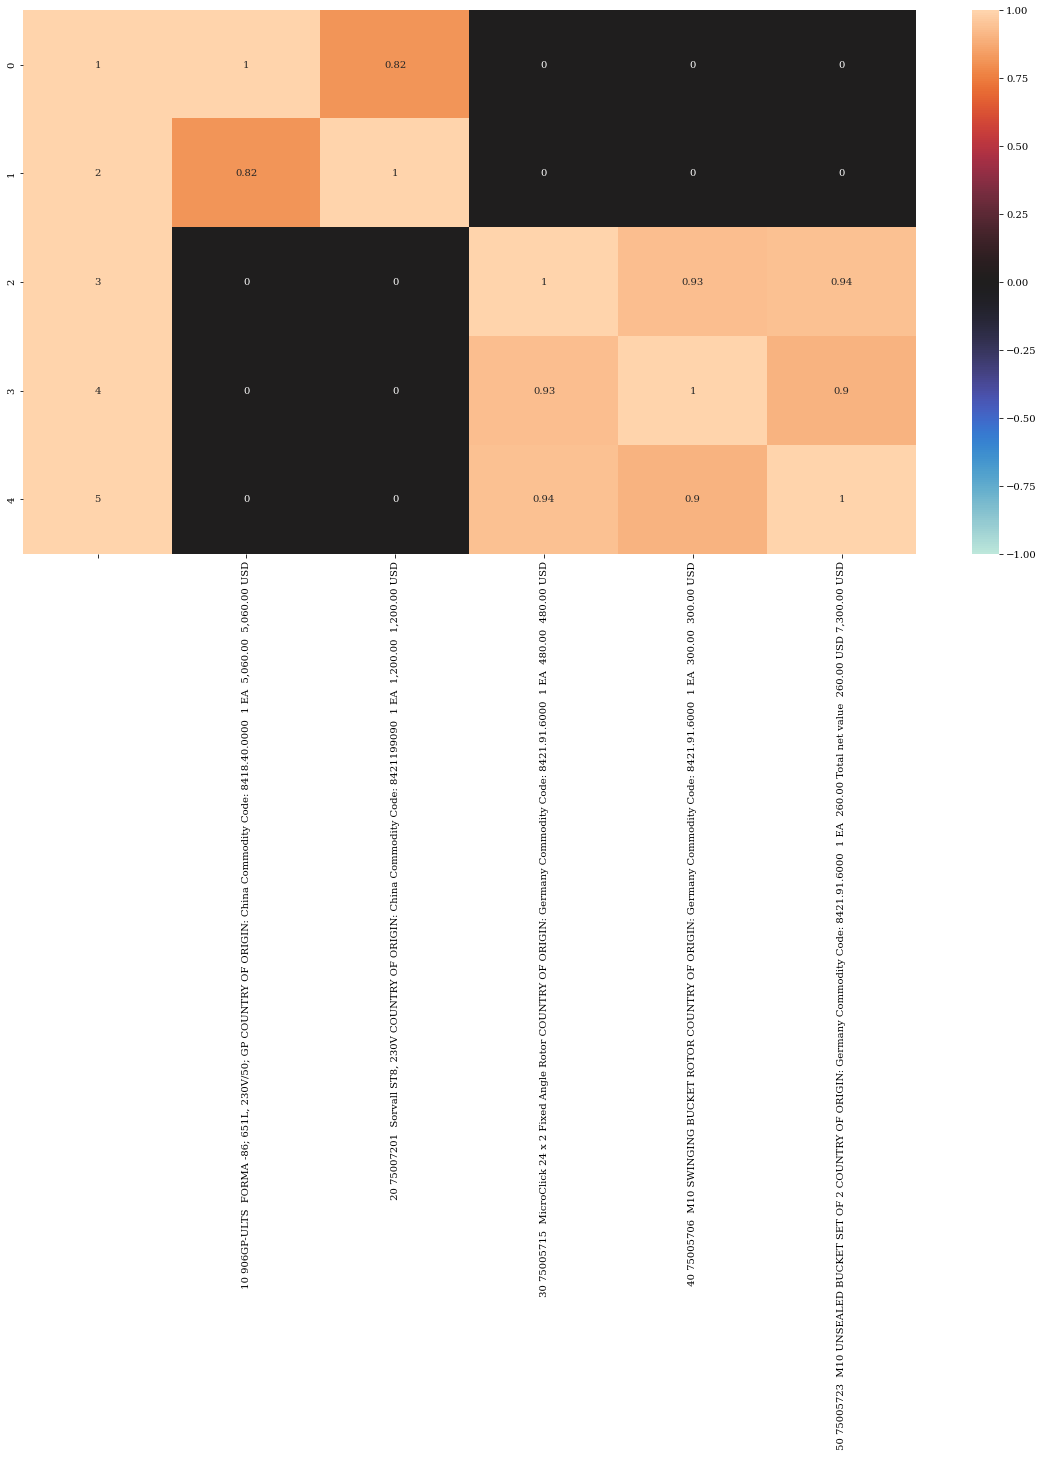

In [ ]:
sns.heatmap(df5, center=0, vmin=-1, vmax=1, annot=True)

In [ ]:
similarity = [["", *a]]
spacy_arr = []
for sent in a:
  doc = SPACY_BERT_LARGE_STSB(sent)
  spacy_arr.append(doc)
idxemb = 0
for doc_1 in spacy_arr:
  idxemb += 1
  arr = [idxemb]
  for doc_2 in spacy_arr:
    result = (doc_1.similarity(doc_2))
    if result < 0.6:
      arr.append(0)
    else:
      arr.append(result)
  similarity.append(arr)

spacy_df5 = pd.DataFrame(similarity[1:], columns=similarity[0])
spacy_df5.head()

...   50 75005723  M10 UNSEALED BUCKET SET OF 2 COUNTRY OF ORIGIN: Germany Commodity Code: 8421.91.6000  1 EA  260.00 Total net value  260.00 USD 7,300.00 USD
0  1  ...                                           0.000000                                                                                                        
1  2  ...                                           0.000000                                                                                                        
2  3  ...                                           0.000000                                                                                                        
3  4  ...                                           0.668413                                                                                                        
4  5  ...                                           1.000000                                                                                                        

[5 rows x 6 columns]

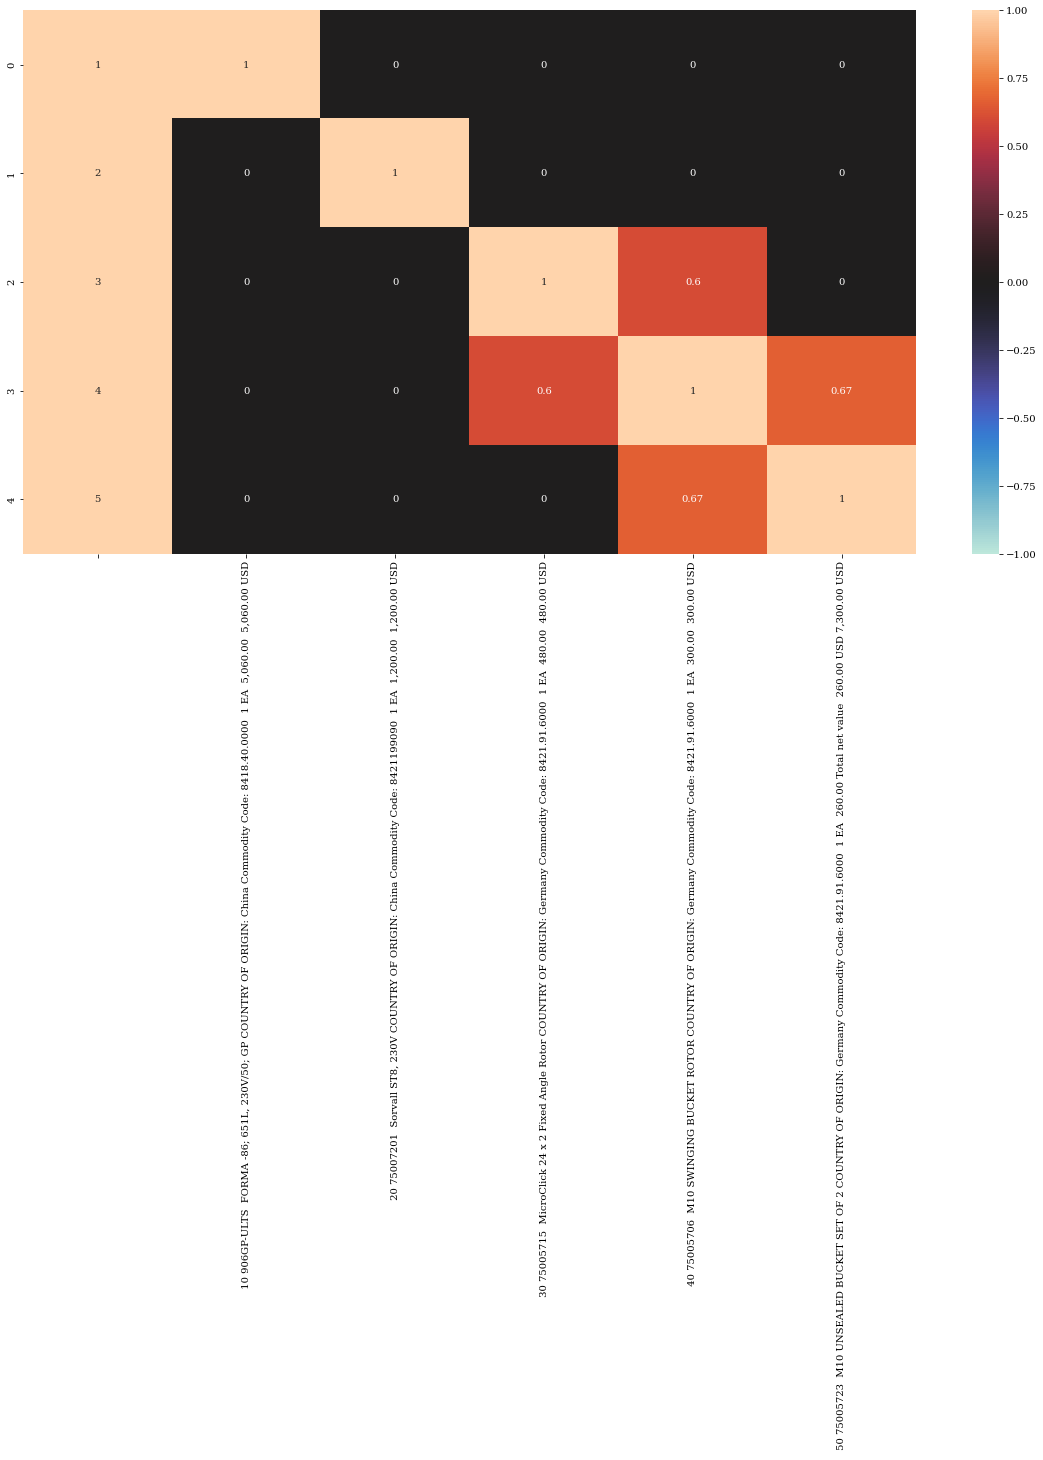

In [ ]:
sns.heatmap(spacy_df5, center=0, vmin=-1, vmax=1, annot=True)